<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [1]:
# Write your code here
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import pandas as pd
data = pd.read_csv('reviews.csv')

/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [3]:
data.head(100)

,Title,Review,Lower Case,Removal of Punctuation,Removal of Special Characters,Stopwords Removal,Spelling Correction,Tokenization,After Stemming,After Lemmatization
0,Sort of disappointed..,I got to admit I wasn't particularly blown awa...,i got to admit i wasn't particularly blown awa...,i got to admit i wasnt particularly blown away...,i got to admit i wasnt particularly blown away...,got admit wasnt particularly blown away anythi...,got admit want particularly blown away anythin...,"['got', 'admit', 'want', 'particularly', 'blow...",got admit want particularli blown away anyth m...,got admit want particularli blown away anyth m...
1,Surprisingly good,I'll be honest - Marvel movies are not in my t...,i'll be honest - marvel movies are not in my t...,ill be honest marvel movies are not in my top...,ill be honest marvel movies are not in my top...,ill honest marvel movies top 20 even 50 within...,ill honest marvel moves top 20 even 50 within ...,"['ill', 'honest', 'marvel', 'moves', 'top', '2...",ill honest marvel move top 20 even 50 within m...,ill honest marvel move top 20 even 50 within m...
2,Worth a watch with family,RATED 8/10 Language: English Source: Hotstar R...,rated 8/10 language: english source: hotstar r...,rated 810 language english source hotstar reco...,rated 810 language english source hotstar reco...,rated 810 language english source hotstar reco...,rate 810 language english source hotstar recom...,"['rate', '810', 'language', 'english', 'source...",rate 810 languag english sourc hotstar recomme...,rate 810 languag english sourc hotstar recomme...
3,A visual feast.,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN
4,Questionable script (and Awkwafina is just the...,The characters are a bit incoherent and straig...,the characters are a bit incoherent and straig...,the characters are a bit incoherent and straig...,the characters are a bit incoherent and straig...,characters bit incoherent straight contradict ...,characters bit incoherent straight contradict ...,"['characters', 'bit', 'incoherent', 'straight'...",charact bit incoher straight contradict charac...,charact bit incoher straight contradict charac...
...,...,...,...,...,...,...,...,...,...,...
95,Amazing!,"MCU aside, this movie stands alone as an epic ...","mcu aside, this movie stands alone as an epic ...",mcu aside this movie stands alone as an epic m...,mcu aside this movie stands alone as an epic m...,mcu aside movie stands alone epic masterpiece ...,you aside movie stands alone epic masterpiece ...,"['you', 'aside', 'movie', 'stands', 'alone', '...",you asid movi stand alon epic masterpiec fight...,you asid movi stand alon epic masterpiec fight...
96,I was hesitant to see this... but I was wrong.,Very good movie. I am not a fan of Kung Fu so ...,very good movie. i am not a fan of kung fu so ...,very good movie i am not a fan of kung fu so i...,very good movie i am not a fan of kung fu so i...,good movie fan kung fu didnt really want see 2...,good movie fan king ff didn really want see 2 ...,"['good', 'movie', 'fan', 'king', 'ff', 'didn',...",good movi fan king ff didn realli want see 2 y...,good movi fan king ff didn realli want see 2 y...
97,Shang Chi was disappointing,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN
98,Out of the Marvel patterns,"I had very few expectations from this one, giv...","i had very few expectations from this one, giv...",i had very few expectations from this one give...,i had very few expectations from this one give...,expectations one given fact origin story chara...,expectations one given fact origin story chara...,"['expectations', 'one', 'given', 'fact', 'orig...",expect one given fact origin stori charact kno...,expect one given fact origin stori charact kno...


## Data Cleaning

In [4]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer


In [5]:
tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
p_stemmer = PorterStemmer()

In [6]:
data['Lower Case'] = data['Lower Case'].fillna('')

In [7]:
data['Lower Case']

0      i got to admit i wasn't particularly blown awa...
1      i'll be honest - marvel movies are not in my t...
2      rated 8/10 language: english source: hotstar r...
3                                                       
4      the characters are a bit incoherent and straig...
                             ...                        
120                                                     
121                                                     
122    i'll make this very brief: if it wasn't for th...
123    i loved the movie , it is awesome , in fact i'...
124    shang-chi (simu liu) discovers that his all-po...
Name: Lower Case, Length: 125, dtype: object

In [8]:
data['Tokenization'] = data['Lower Case'].apply(lambda x: tokenizer.tokenize(x))
data['Tokens'] = data['Tokenization'].apply(lambda x: [i for i in x if not i in en_stop])
data['Stemming'] = data['Tokens'].apply(lambda x: [p_stemmer.stem(i) for i in x])

In [9]:
texts = []
for line in data['Stemming']:
  texts.append(line)

## Bigrams and Trigrams

In [10]:
from gensim import corpora, models
bigram = models.Phrases(texts, min_count=5, threshold=100)
trigram = models.Phrases(bigram[texts], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[texts[0]]])

['got', 'admit', 'wasn', 't', 'particularli', 'blown', 'away', 'anyth', 'movi', 'might', 'even', 'say', 'bore', 'don', 't', 'get', 'wrong', 'spectacl', 'action', 'great', 'locat', 'nice', 'costum', 'design', 'sound', 'design', 'etc', 'overal', 'soft', 'releas', 'worth', 'see', 'theater', 'special', 'follow', 'endgam', 'biggest', 'problem', 'underwritten', 'lead', 'muddl', 'person', 'reason', 'cover', 'stori', 'devoid', 'charm', 'person', 'good', 'dialogu', 'next', 'issu', 'humor', 'didn', 't', 'land', 'support', 'lead', 'awkwafina', 'isn', 't', 'normal', 'loud', 'self', 's', 'suppos', 'funni', 'everi', 'time', 'open', 'mouth', 'role', 'support', 'littl', 'dramat', 'question', 'even', 'doesn', 't', 'ultim', 'matter', 'anoth', 'forgett', 'charact', 'given', 'import', 'role', 'deserv', 'final', 'third', 'act', 'weak', 's', 'balanc', 'problem', 'stake', 'can', 't', 'feel', 'tension', 'weight', 'action', 's', 'lot', 'superfici', 'can', 't', 'can', 'end', 'feel', 'like', 'safe', 'plot', 'wri

In [11]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [12]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [13]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [16]:
from spacy.cli.download import download
download(model="en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 792.8 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [14]:
import spacy
data_words_bigrams = make_bigrams(texts)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['get', 'admit', 'wasn', 'particularli', 'blow', 'movi', 'even', 'say', 'get', 'wrong', 'spectacl', 'action', 'great', 'design', 'sound', 'design', 'overal', 'soft', 'relea', 'worth', 'see', 'theater', 'special', 'follow', 'endgam', 'big', 'problem', 'underwrite', 'lead', 'muddl', 'person', 'reason', 'cover', 'stori', 'devoid', 'charm', 'person', 'good', 'dialogu', 'next', 'land', 'support', 'normal', 'loud', 'self', 'suppos', 'time', 'open', 'mouth', 'role', 'support', 'dramat', 'question', 'even', 'matter', 'charact', 'give', 'import', 'role', 'final', 'act', 'stake', 't', 'feel', 'tension', 'weight', 'action', 'lot', 'superfici', 'end', 'feel', 'safe', 'plot', 'write', 'way', 'appeal', 'portray', 'end', 'appeal', 'feel', 'marvel', 'movi', 'bind', 'happen', 'differ', 'also', 'doesn', 'feel', 'comic', 'book', 'gener']]


## Preparing Corpus and Dictionary

In [15]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 2), (22, 4), (23, 1), (24, 1), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)]]


In [16]:
id2word[0]

'act'

In [17]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('act', 1),
  ('action', 2),
  ('admit', 1),
  ('also', 1),
  ('appeal', 2),
  ('big', 1),
  ('bind', 1),
  ('blow', 1),
  ('book', 1),
  ('charact', 1),
  ('charm', 1),
  ('comic', 1),
  ('cover', 1),
  ('design', 2),
  ('devoid', 1),
  ('dialogu', 1),
  ('differ', 1),
  ('doesn', 1),
  ('dramat', 1),
  ('end', 2),
  ('endgam', 1),
  ('even', 2),
  ('feel', 4),
  ('final', 1),
  ('follow', 1),
  ('gener', 1),
  ('get', 2),
  ('give', 1),
  ('good', 1),
  ('great', 1),
  ('happen', 1),
  ('import', 1),
  ('land', 1),
  ('lead', 1),
  ('lot', 1),
  ('loud', 1),
  ('marvel', 1),
  ('matter', 1),
  ('mouth', 1),
  ('movi', 2),
  ('muddl', 1),
  ('next', 1),
  ('normal', 1),
  ('open', 1),
  ('overal', 1),
  ('particularli', 1),
  ('person', 2),
  ('plot', 1),
  ('portray', 1),
  ('problem', 1),
  ('question', 1),
  ('reason', 1),
  ('relea', 1),
  ('role', 2),
  ('safe', 1),
  ('say', 1),
  ('see', 1),
  ('self', 1),
  ('soft', 1),
  ('sound', 1),
  ('special', 1),
  ('spectacl', 1),
  

## LDA

In [18]:
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [19]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.027*"see" + 0.027*"movi" + 0.024*"phase" + 0.020*"seem" + 0.017*"now" + '
  '0.016*"start" + 0.015*"love" + 0.013*"laugh" + 0.012*"asian" + '
  '0.012*"anoth"'),
 (1,
  '0.027*"cinema" + 0.026*"bad" + 0.024*"low" + 0.018*"come" + 0.018*"friend" '
  '+ 0.016*"movi" + 0.015*"histori" + 0.015*"touch" + 0.014*"sure" + '
  '0.014*"charact"'),
 (2,
  '0.035*"good" + 0.022*"charact" + 0.022*"film" + 0.020*"make" + 0.020*"feel" '
  '+ 0.018*"movi" + 0.017*"well" + 0.016*"stori" + 0.015*"marvel" + '
  '0.015*"fight"'),
 (3,
  '0.023*"regret" + 0.009*"music" + 0.008*"go" + 0.007*"obsess" + 0.007*"find" '
  '+ 0.007*"background" + 0.005*"point" + 0.005*"watch" + 0.004*"invest" + '
  '0.004*"crave"'),
 (4,
  '0.018*"fight" + 0.018*"stori" + 0.016*"power" + 0.016*"great" + '
  '0.015*"effect" + 0.013*"much" + 0.012*"special" + 0.011*"look" + '
  '0.010*"just" + 0.010*"see"'),
 (5,
  '0.024*"slow" + 0.024*"writer" + 0.019*"usual" + 0.019*"arm" + '
  '0.007*"dramat" + 0.006*"lead" + 0.006*"

In [20]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.105172119272514

Coherence Score:  0.3611639284182605


## Visualization using pyLDAvis

In [21]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis 
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
pyLDAvis.enable_notebook()

In [23]:
try:
    vis = gensimvis.prepare(lda_model, corpus, id2word, n_jobs=1)  # Using n_jobs=1 to disable parallel processing
    pyLDAvis.display(vis)
except Exception as e:
    print("An error occurred:", e)

In [24]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.159959  0.074700       1        1  37.095211
2      0.250261  0.038827       2        1  29.358012
4      0.063308 -0.234907       3        1  11.128411
0     -0.039170  0.019768       4        1   7.763641
7     -0.014066  0.037171       5        1   4.345296
1     -0.070639  0.005638       6        1   3.302917
9     -0.086378  0.025078       7        1   2.576442
5     -0.099709  0.012753       8        1   2.170451
8     -0.093300  0.008142       9        1   1.405643
3     -0.070267  0.012830      10        1   0.853977, topic_info=        Term       Freq      Total Category  logprob  loglift
9    charact  41.000000  41.000000  Default  30.0000  30.0000
63     stori  57.000000  57.000000  Default  29.0000  29.0000
160    scene  42.000000  42.000000  Default  28.0000  28.0000
56       see  52.000000  52.000000  Default  27.0000  27.0000
136      bad  20.000000  20.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
192       go   0.341770  21.428558  Topic10  -4.8110   0.6247
301    point   0.196432   8.736764  Topic10  -5.3649   0.9680
223   direct   0.167143   6.543818  Topic10  -5.5263   1.0956
133    watch   0.194166  35.331449  Topic10  -5.3765  -0.4408
76     write   0.166981  10.033805  Topic10  -5.5273   0.6672

[515 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
254       1  0.910074  absolut
169       4  0.819803   accept
0         1  0.625035      act
0         2  0.312517      act
1         1  0.496166   action
...     ...       ...      ...
305       1  0.472483     year
305       2  0.236242     year
305       4  0.177181     year
305       6  0.059060     year
876       2  0.770334    young

[543 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 5, 1, 8, 2, 10, 6, 9, 4])

## LSA

In [25]:
lsamodel = models.LsiModel(corpus, num_topics = 20, id2word = id2word)

/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:932: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 -

In [26]:
pprint(lsamodel.print_topics(num_topics = 10))

[(0,
  '-0.447*"movi" + -0.266*"good" + -0.239*"just" + -0.222*"marvel" + '
  '-0.215*"fight" + -0.187*"make" + -0.183*"way" + -0.172*"see" + -0.149*"get" '
  '+ -0.144*"charact"'),
 (1,
  '-0.324*"marvel" + 0.216*"movi" + -0.212*"film" + 0.211*"villain" + '
  '0.192*"asian" + 0.181*"chine" + -0.163*"stori" + 0.140*"make" + '
  '-0.120*"start" + 0.119*"blend"'),
 (2,
  '-0.320*"movi" + 0.253*"way" + -0.252*"good" + 0.191*"chine" + '
  '-0.170*"great" + 0.159*"get" + 0.149*"cour" + -0.144*"stori" + 0.137*"type" '
  '+ -0.133*"action"'),
 (3,
  '-0.381*"good" + 0.312*"film" + -0.176*"also" + 0.175*"fight" + '
  '0.174*"action" + 0.149*"way" + -0.139*"make" + 0.139*"just" + '
  '-0.136*"watch" + 0.121*"power"'),
 (4,
  '-0.488*"movi" + 0.359*"fight" + -0.296*"marvel" + 0.255*"scene" + '
  '0.189*"stori" + 0.171*"much" + 0.170*"great" + 0.143*"good" + -0.128*"just" '
  '+ 0.125*"way"'),
 (5,
  '0.370*"stori" + -0.264*"also" + 0.192*"fight" + -0.162*"well" + '
  '-0.161*"much" + 0.157*"good

LSA Model with 2 topics:
[(0,
  '-0.447*"movi" + -0.266*"good" + -0.239*"just" + -0.222*"marvel" + '
  '-0.215*"fight" + -0.187*"make" + -0.183*"way" + -0.172*"see" + -0.149*"get" '
  '+ -0.144*"charact"'),
 (1,
  '0.324*"marvel" + -0.216*"movi" + 0.212*"film" + -0.211*"villain" + '
  '-0.192*"asian" + -0.181*"chine" + 0.163*"stori" + -0.140*"make" + '
  '0.120*"start" + -0.119*"blend"')]


/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:932: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 -

Coherence Value for 2 topics: nan
LSA Model with 3 topics:
[(0,
  '-0.447*"movi" + -0.266*"good" + -0.239*"just" + -0.222*"marvel" + '
  '-0.215*"fight" + -0.187*"make" + -0.183*"way" + -0.172*"see" + -0.149*"get" '
  '+ -0.144*"charact"'),
 (1,
  '0.324*"marvel" + -0.216*"movi" + 0.212*"film" + -0.211*"villain" + '
  '-0.192*"asian" + -0.181*"chine" + 0.163*"stori" + -0.140*"make" + '
  '0.120*"start" + -0.119*"blend"'),
 (2,
  '0.320*"movi" + -0.253*"way" + 0.252*"good" + -0.191*"chine" + 0.170*"great" '
  '+ -0.159*"get" + -0.149*"cour" + 0.144*"stori" + -0.137*"type" + '
  '0.133*"action"')]


/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:932: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: Depre

Coherence Value for 3 topics: nan
LSA Model with 4 topics:
[(0,
  '-0.447*"movi" + -0.266*"good" + -0.239*"just" + -0.222*"marvel" + '
  '-0.215*"fight" + -0.187*"make" + -0.183*"way" + -0.172*"see" + -0.149*"get" '
  '+ -0.144*"charact"'),
 (1,
  '-0.324*"marvel" + 0.216*"movi" + -0.212*"film" + 0.211*"villain" + '
  '0.192*"asian" + 0.181*"chine" + -0.163*"stori" + 0.140*"make" + '
  '-0.120*"start" + 0.119*"blend"'),
 (2,
  '0.320*"movi" + -0.253*"way" + 0.252*"good" + -0.191*"chine" + 0.170*"great" '
  '+ -0.159*"get" + -0.149*"cour" + 0.144*"stori" + -0.137*"type" + '
  '0.133*"action"'),
 (3,
  '0.381*"good" + -0.312*"film" + 0.176*"also" + -0.175*"fight" + '
  '-0.174*"action" + -0.149*"way" + 0.139*"make" + -0.139*"just" + '
  '0.136*"watch" + -0.121*"power"')]


/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:932: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 -

Coherence Value for 4 topics: nan
LSA Model with 5 topics:
[(0,
  '-0.447*"movi" + -0.266*"good" + -0.239*"just" + -0.222*"marvel" + '
  '-0.215*"fight" + -0.187*"make" + -0.183*"way" + -0.172*"see" + -0.149*"get" '
  '+ -0.144*"charact"'),
 (1,
  '0.324*"marvel" + -0.216*"movi" + 0.212*"film" + -0.211*"villain" + '
  '-0.192*"asian" + -0.181*"chine" + 0.163*"stori" + -0.140*"make" + '
  '0.120*"start" + -0.119*"blend"'),
 (2,
  '0.320*"movi" + -0.253*"way" + 0.252*"good" + -0.191*"chine" + 0.170*"great" '
  '+ -0.159*"get" + -0.149*"cour" + 0.144*"stori" + -0.137*"type" + '
  '0.133*"action"'),
 (3,
  '0.381*"good" + -0.312*"film" + 0.176*"also" + -0.175*"fight" + '
  '-0.174*"action" + -0.149*"way" + 0.139*"make" + -0.139*"just" + '
  '0.136*"watch" + -0.121*"power"'),
 (4,
  '-0.488*"movi" + 0.359*"fight" + -0.296*"marvel" + 0.255*"scene" + '
  '0.189*"stori" + 0.171*"much" + 0.170*"great" + 0.143*"good" + -0.128*"just" '
  '+ 0.125*"way"')]


/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:932: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 -

Coherence Value for 5 topics: nan
LSA Model with 6 topics:
[(0,
  '-0.447*"movi" + -0.266*"good" + -0.239*"just" + -0.222*"marvel" + '
  '-0.215*"fight" + -0.187*"make" + -0.183*"way" + -0.172*"see" + -0.149*"get" '
  '+ -0.144*"charact"'),
 (1,
  '0.324*"marvel" + -0.216*"movi" + 0.212*"film" + -0.211*"villain" + '
  '-0.192*"asian" + -0.181*"chine" + 0.163*"stori" + -0.140*"make" + '
  '0.120*"start" + -0.119*"blend"'),
 (2,
  '-0.320*"movi" + 0.253*"way" + -0.252*"good" + 0.191*"chine" + '
  '-0.170*"great" + 0.159*"get" + 0.149*"cour" + -0.144*"stori" + 0.137*"type" '
  '+ -0.133*"action"'),
 (3,
  '-0.381*"good" + 0.312*"film" + -0.176*"also" + 0.175*"fight" + '
  '0.174*"action" + 0.149*"way" + -0.139*"make" + 0.139*"just" + '
  '-0.136*"watch" + 0.121*"power"'),
 (4,
  '-0.488*"movi" + 0.359*"fight" + -0.296*"marvel" + 0.255*"scene" + '
  '0.189*"stori" + 0.171*"much" + 0.170*"great" + 0.143*"good" + -0.128*"just" '
  '+ 0.125*"way"'),
 (5,
  '-0.370*"stori" + 0.264*"also" + -0.

/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:932: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 -

Coherence Value for 6 topics: nan


/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:932: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 -

LSA Model with 7 topics:
[(0,
  '-0.447*"movi" + -0.266*"good" + -0.239*"just" + -0.222*"marvel" + '
  '-0.215*"fight" + -0.187*"make" + -0.183*"way" + -0.172*"see" + -0.149*"get" '
  '+ -0.144*"charact"'),
 (1,
  '-0.324*"marvel" + 0.216*"movi" + -0.212*"film" + 0.211*"villain" + '
  '0.192*"asian" + 0.181*"chine" + -0.163*"stori" + 0.140*"make" + '
  '-0.120*"start" + 0.119*"blend"'),
 (2,
  '-0.320*"movi" + 0.253*"way" + -0.252*"good" + 0.191*"chine" + '
  '-0.170*"great" + 0.159*"get" + 0.149*"cour" + -0.144*"stori" + 0.137*"type" '
  '+ -0.133*"action"'),
 (3,
  '-0.381*"good" + 0.312*"film" + -0.176*"also" + 0.175*"fight" + '
  '0.174*"action" + 0.149*"way" + -0.139*"make" + 0.139*"just" + '
  '-0.136*"watch" + 0.121*"power"'),
 (4,
  '0.488*"movi" + -0.359*"fight" + 0.296*"marvel" + -0.255*"scene" + '
  '-0.189*"stori" + -0.171*"much" + -0.170*"great" + -0.143*"good" + '
  '0.128*"just" + -0.125*"way"'),
 (5,
  '0.370*"stori" + -0.264*"also" + 0.192*"fight" + -0.162*"well" + '
 

/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:932: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 -

Coherence Value for 8 topics: nan
LSA Model with 9 topics:
[(0,
  '-0.447*"movi" + -0.266*"good" + -0.239*"just" + -0.222*"marvel" + '
  '-0.215*"fight" + -0.187*"make" + -0.183*"way" + -0.172*"see" + -0.149*"get" '
  '+ -0.144*"charact"'),
 (1,
  '0.324*"marvel" + -0.216*"movi" + 0.212*"film" + -0.211*"villain" + '
  '-0.192*"asian" + -0.181*"chine" + 0.163*"stori" + -0.140*"make" + '
  '0.120*"start" + -0.119*"blend"'),
 (2,
  '-0.320*"movi" + 0.253*"way" + -0.252*"good" + 0.191*"chine" + '
  '-0.170*"great" + 0.159*"get" + 0.149*"cour" + -0.144*"stori" + 0.137*"type" '
  '+ -0.133*"action"'),
 (3,
  '-0.381*"good" + 0.312*"film" + -0.176*"also" + 0.175*"fight" + '
  '0.174*"action" + 0.149*"way" + -0.139*"make" + 0.139*"just" + '
  '-0.136*"watch" + 0.121*"power"'),
 (4,
  '0.488*"movi" + -0.359*"fight" + 0.296*"marvel" + -0.255*"scene" + '
  '-0.189*"stori" + -0.171*"much" + -0.170*"great" + -0.143*"good" + '
  '0.128*"just" + -0.125*"way"'),
 (5,
  '-0.370*"stori" + 0.264*"also" +

/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:932: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 -

Coherence Value for 9 topics: nan
LSA Model with 10 topics:
[(0,
  '-0.447*"movi" + -0.266*"good" + -0.239*"just" + -0.222*"marvel" + '
  '-0.215*"fight" + -0.187*"make" + -0.183*"way" + -0.172*"see" + -0.149*"get" '
  '+ -0.144*"charact"'),
 (1,
  '0.324*"marvel" + -0.216*"movi" + 0.212*"film" + -0.211*"villain" + '
  '-0.192*"asian" + -0.181*"chine" + 0.163*"stori" + -0.140*"make" + '
  '0.120*"start" + -0.119*"blend"'),
 (2,
  '-0.320*"movi" + 0.253*"way" + -0.252*"good" + 0.191*"chine" + '
  '-0.170*"great" + 0.159*"get" + 0.149*"cour" + -0.144*"stori" + 0.137*"type" '
  '+ -0.133*"action"'),
 (3,
  '0.381*"good" + -0.312*"film" + 0.176*"also" + -0.175*"fight" + '
  '-0.174*"action" + -0.149*"way" + 0.139*"make" + -0.139*"just" + '
  '0.136*"watch" + -0.121*"power"'),
 (4,
  '0.488*"movi" + -0.359*"fight" + 0.296*"marvel" + -0.255*"scene" + '
  '-0.189*"stori" + -0.171*"much" + -0.170*"great" + -0.143*"good" + '
  '0.128*"just" + -0.125*"way"'),
 (5,
  '0.370*"stori" + -0.264*"also

/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:932: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 -

Coherence Value for 10 topics: nan
LSA Model with 11 topics:
[(0,
  '-0.447*"movi" + -0.266*"good" + -0.239*"just" + -0.222*"marvel" + '
  '-0.215*"fight" + -0.187*"make" + -0.183*"way" + -0.172*"see" + -0.149*"get" '
  '+ -0.144*"charact"'),
 (1,
  '-0.324*"marvel" + 0.216*"movi" + -0.212*"film" + 0.211*"villain" + '
  '0.192*"asian" + 0.181*"chine" + -0.163*"stori" + 0.140*"make" + '
  '-0.120*"start" + 0.119*"blend"'),
 (2,
  '-0.320*"movi" + 0.253*"way" + -0.252*"good" + 0.191*"chine" + '
  '-0.170*"great" + 0.159*"get" + 0.149*"cour" + -0.144*"stori" + 0.137*"type" '
  '+ -0.133*"action"'),
 (3,
  '0.381*"good" + -0.312*"film" + 0.176*"also" + -0.175*"fight" + '
  '-0.174*"action" + -0.149*"way" + 0.139*"make" + -0.139*"just" + '
  '0.136*"watch" + -0.121*"power"'),
 (4,
  '-0.488*"movi" + 0.359*"fight" + -0.296*"marvel" + 0.255*"scene" + '
  '0.189*"stori" + 0.171*"much" + 0.170*"great" + 0.143*"good" + -0.128*"just" '
  '+ 0.125*"way"'),
 (5,
  '0.370*"stori" + -0.264*"also" + 0

/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/gensim/models/lsimodel.py:932: DeprecationWarning: `scipy.sparse.sparsetools.csc_matvecs` is deprecated along with the `scipy.sparse.sparsetools` namespace. `scipy.sparse.sparsetools.csc_matvecs` will be removed in SciPy 1.14.0, and the `scipy.sparse.sparsetools` namespace will be removed in SciPy 2.0.0.
  sparsetools.csc_matvecs(m, n, samples, corpus.indptr, corpus.indices,
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 - tri(m.shape[0], m.shape[1], k - 1, m.dtype.char)) * m
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/scipy/linalg/_special_matrices.py:154: DeprecationWarning: 'tri'/'tril/'triu' are deprecated as of SciPy 1.11.0 and will be removed in v1.13.0. Please use numpy.(tri/tril/triu) instead.
  out = (1 -

Coherence Value for 11 topics: nan


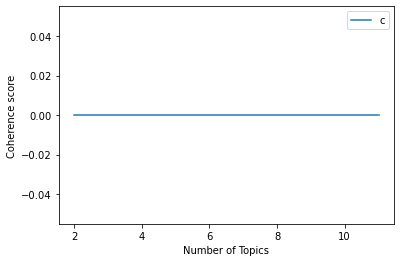

In [27]:
from gensim.models import CoherenceModel, LsiModel
import numpy as np


model_list = []
coherence_values = []
for num_topics in range(2, 12):
    model = LsiModel(corpus, num_topics=num_topics, id2word=id2word)
    model_list.append(model)
    
    print(f"LSA Model with {num_topics} topics:")
    pprint(model.print_topics())
    
    coherencemodel = CoherenceModel(model=model, texts=data['Stemming'], dictionary=id2word, coherence='c_v')
    coherence = coherencemodel.get_coherence()
    
    print(f"Coherence Value for {num_topics} topics: {coherence}")
    
    coherence_values.append(coherence)


clean_coherence_values = [value if not np.isnan(value) else 0 for value in coherence_values]  # Replace nan with 0

plt.plot(range(2, 12), clean_coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## Summarization of LDA Topics

### Topic 1: Evolving Cinema and Audience Expectations
- **Key Terms:** see, movie, phase, seem, now
- **Description:** Discussions revolve around the evolving phases of movies and how they are perceived by audiences now, with expressions of affection and humor.

### Topic 2: Cinematic Experience and Historical Impact
- **Key Terms:** cinema, bad, low, come, friend
- **Description:** Commentary on cinema experiences, possibly those considered to be of lower quality, and their impact on viewers and historical portrayal.

### Topic 3: Narrative and Character Development
- **Key Terms:** good, character, film, make, feel
- **Description:** Insights into the quality of film narratives, the development of characters, and the feelings they evoke, alongside the craftsmanship of storytelling.

### Topic 4: Musical Influence and Viewer's Regret
- **Key Terms:** regret, music, go, obsess, find
- **Description:** Reflections on the musical score and its impact on the viewer's experience, including emotions of regret and obsession.

### Topic 5: Action Scenes and Visual Effects
- **Key Terms:** fight, story, power, great, effect
- **Description:** Appreciation for the powerful storytelling and great action scenes, accentuated by special effects and visuals.

### Topic 6: Pacing and Creative Writing
- **Key Terms:** slow, writer, usual, arm, dramatic
- **Description:** Opinions on the pacing of movies, with specific mentions of the writing style and its departure from the usual, along with dramatic elements.

### Topic 7: Overall Movie Enjoyment
- **Key Terms:** movie, marvel, just, good, see
- **Description:** General impressions of movies, particularly Marvel films, emphasizing the action and story quality that make them enjoyable.

### Topic 8: Storytelling and Character Arcs
- **Key Terms:** force, story, scene, part, develop
- **Description:** Discussions on the forceful storytelling and scene development, and how they contribute to the solid performance and unfolding of character arcs.

### Topic 9: Individuality and Superhero Tropes
- **Key Terms:** bear, guess, care, superhero, single
- **Description:** Thoughts on superhero films and the individual journey of characters, possibly critiquing certain tropes or highlighting personal care for the narratives.

### Topic 10: Predictability and Cultural Myths
- **Key Terms:** decent, sound, predict, claim, play
- **Description:** Critiques of the predictability in movies, the authenticity of sound design, and the portrayal of mythological elements within the storytelling.


## Summarization of LSA Topics

### Topic 1: General Movie Critique
- **Key Terms:** movie, good, just, marvel, fight
- **Description:** A broad negative sentiment toward movies in general, with mentions of Marvel and fight scenes.

### Topic 2: Cultural Representation in Film
- **Key Terms:** marvel, movie, film, villain, asian
- **Description:** Contrasting views on Marvel movies, with a focus on villains and Asian representation in film.

### Topic 3: Movie Perspectives and Cultural Storytelling
- **Key Terms:** movie, way, good, chinese, great
- **Description:** Discussions around movies with an emphasis on good storytelling, possibly with Chinese cultural elements.

### Topic 4: Film Criticism and Action Focus
- **Key Terms:** good, film, fight, action, way
- **Description:** Critical take on films, highlighting action sequences and their impact on the audience's perception of quality.

### Topic 5: Narrative and Conflict in Movies
- **Key Terms:** movie, fight, marvel, scene, story
- **Description:** Analysis of movie narratives and fight scenes, indicating a tension between story depth and great visual moments.

### Topic 6: Storytelling Nuances
- **Key Terms:** story, also, fight, well, good
- **Description:** A more nuanced look at storytelling that considers the 'also' elements beyond the main plot, including side stories and underlying themes.

### Topic 7: Film Quality and Viewer Engagement
- **Key Terms:** film, good, great, movie, see
- **Description:** Negative perspective on film quality but acknowledges the greatness seen by viewers and the engaging action scenes.

### Topic 8: Emotional Engagement and Character Depth
- **Key Terms:** feel, marvel, character, action, even
- **Description:** The emotional responses elicited by Marvel films, character development, and the effectiveness of action scenes.

### Topic 9: Marvel Cinematic Universe and Visuals
- **Key Terms:** marvel, good, just, see, scene
- **Description:** A mix of positive and negative views on the Marvel Cinematic Universe, highlighting the visuals and the general reception.

### Topic 10: Critical Reception and Thoughtful Insights
- **Key Terms:** well, good, marvel, get, think
- **Description:** Good reception of certain aspects of Marvel films, while also considering deeper thoughts on the universe it portrays and the scenes it creates.


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [32]:
# Write your code here
data = pd.read_csv("Q4 reviews.csv")


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [37]:
# Write your code here
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")



In [38]:
train_dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [39]:
print(train_dataset.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [40]:
print(test_dataset.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


## EDA

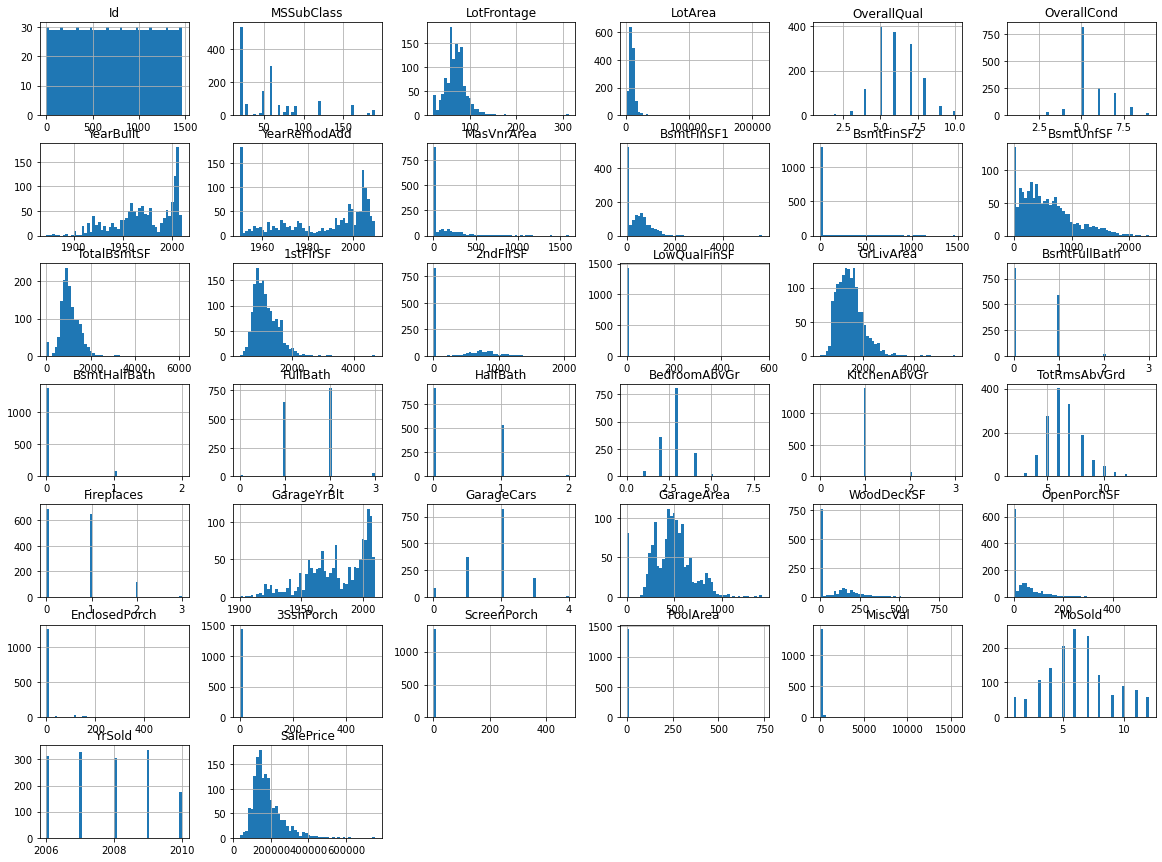

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
train_dataset.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [49]:
numeric_cols = train_dataset.select_dtypes(include=[np.number])

corr_matrix = numeric_cols.corr()

sorted_correlations = corr_matrix["SalePrice"].sort_values(ascending=False)

print(sorted_correlations)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

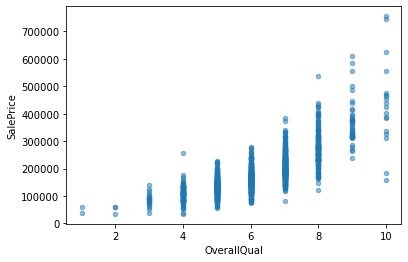

In [43]:
train_dataset.plot(kind="scatter", x="OverallQual", y="SalePrice", alpha=0.5)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

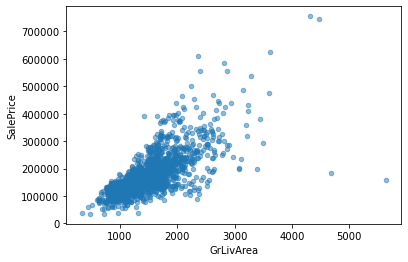

In [44]:
train_dataset.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.5)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

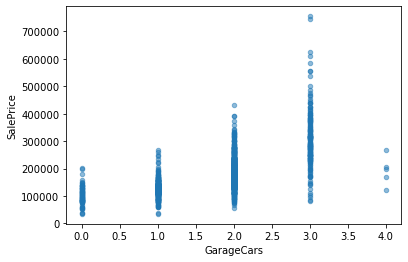

In [45]:

train_dataset.plot(kind="scatter", x="GarageCars", y="SalePrice", alpha=0.5)

<AxesSubplot:>

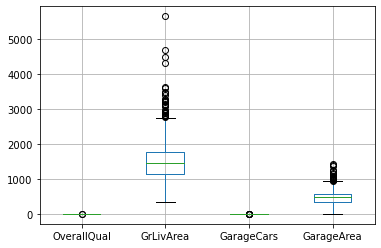

In [46]:
train_dataset.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

<AxesSubplot:>

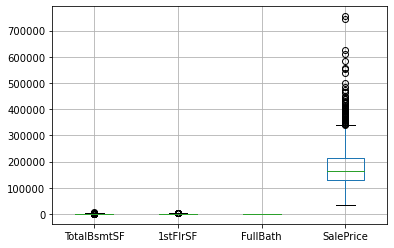

In [47]:
train_dataset.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

In [50]:
print(train_dataset.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [51]:
train_dataset = train_dataset.apply(pd.to_numeric, errors='coerce')
test_dataset = test_dataset.apply(pd.to_numeric, errors='coerce')

In [52]:
train_dataset.fillna(train_dataset.mean(), inplace=True)
test_dataset.fillna(test_dataset.mean(), inplace=True)

In [53]:
print(train_dataset.isnull().sum())
print(test_dataset.isnull().sum())

Id                  0
MSSubClass          0
MSZoning         1460
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType         1460
SaleCondition    1460
SalePrice           0
Length: 81, dtype: int64
Id                  0
MSSubClass          0
MSZoning         1459
LotFrontage         0
LotArea             0
                 ... 
MiscVal             0
MoSold              0
YrSold              0
SaleType         1459
SaleCondition    1459
Length: 80, dtype: int64


In [54]:

train_dataset.fillna(train_dataset.mean(), inplace = True)
test_dataset.fillna(test_dataset.mean(), inplace = True)

In [55]:
print(train_dataset.isnull().sum())

Id                  0
MSSubClass          0
MSZoning         1460
LotFrontage         0
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType         1460
SaleCondition    1460
SalePrice           0
Length: 81, dtype: int64


In [56]:

print(test_dataset.isnull().sum())

Id                  0
MSSubClass          0
MSZoning         1459
LotFrontage         0
LotArea             0
                 ... 
MiscVal             0
MoSold              0
YrSold              0
SaleType         1459
SaleCondition    1459
Length: 80, dtype: int64


## Data Encoding

In [57]:
from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for column in columns:
    encoder = LabelEncoder()
    encoder.fit(list(train_dataset[column].values))
    train_dataset[column] = encoder.transform(list(train_dataset[column].values))

In [58]:
for column in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(test_dataset[column].values))
    test_dataset[column] = encoder_test.transform(list(test_dataset[column].values))

In [59]:
x_values = train_dataset[train_dataset.columns[:80]] 

In [60]:

x_test_values = test_dataset[test_dataset.columns[:80]]

In [61]:

y_values = train_dataset['SalePrice']

## Training the Model

In [62]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_values, y_values)
reg_model.score(x_values, y_values)

/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a

0.8135133793821676

## Predicting the House Sale Price

In [63]:
predicted = reg_model.predict(x_test_values)

/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
/home/joelnyongesa/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a

In [64]:
pd.DataFrame({'Predicted House Price Values': predicted})

,Predicted House Price Values
0,116554.069775
1,151362.702797
2,170786.346810
3,197939.017805
4,192306.078574
...,...
1454,57292.367917
1455,64527.075453
1456,170735.232571
1457,94878.025551


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3. 

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models. 
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics. 
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
# Write your code here


